In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("E:\\ml_app_salaryprediction\\survey_results_public.csv")
pd.set_option('display.max_columns', len(df.columns))


In [47]:
df = pd.read_csv("E:\\ml_app_salaryprediction\\survey_results_public.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [48]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [49]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [50]:
df = df.loc[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [52]:
df.isnull().sum()

Country           0
EdLevel           0
YearsCodePro    194
Employment       12
Salary            0
dtype: int64

In [53]:
df=df.dropna()
df.isnull().sum()


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [55]:
df=df[df['Employment']=='Employed, full-time']
df=df.drop('Employment',axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [69]:
print(df.Country.value_counts().values[0])
print(df.Country.value_counts().index[0])

10569
United States of America


In [64]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [70]:
country_map = shorten_categories(df.Country.value_counts(), 400)
print(country_map)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

{'United States of America': 'United States of America', 'Other': 'Other', 'Germany': 'Germany', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom of Great Britain and Northern Ireland', 'Canada': 'Canada', 'India': 'India', 'France': 'France', 'Netherlands': 'Netherlands', 'Australia': 'Australia', 'Brazil': 'Brazil', 'Spain': 'Spain', 'Sweden': 'Sweden', 'Italy': 'Italy', 'Poland': 'Poland', 'Switzerland': 'Switzerland', 'Denmark': 'Denmark', 'Norway': 'Norway', 'Israel': 'Israel'}


Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


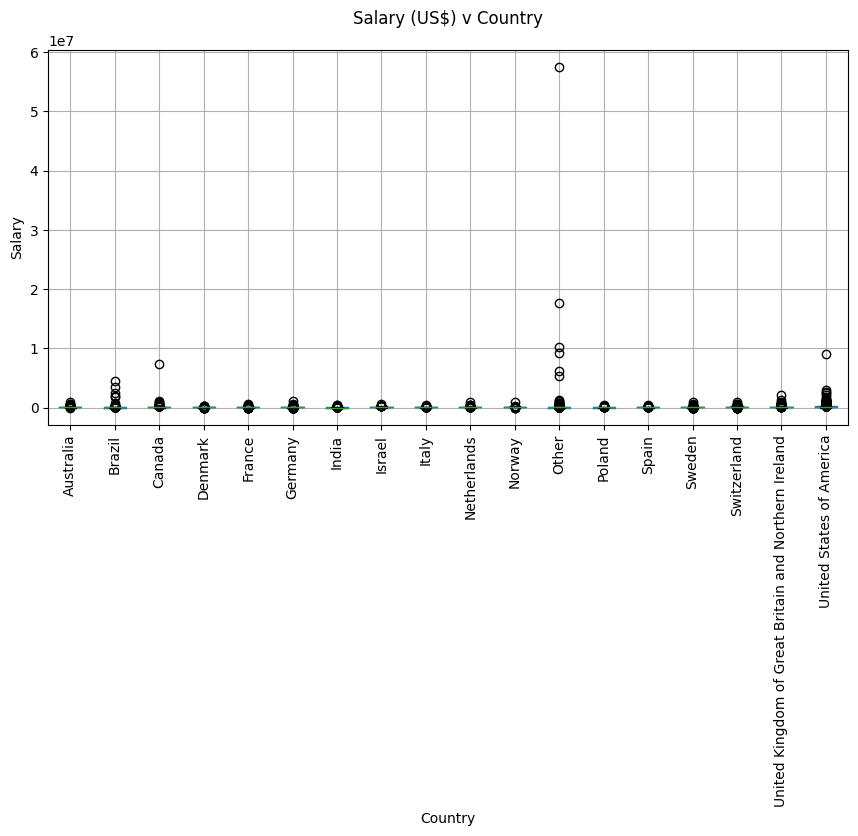

In [74]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=110)
plt.show()

In [81]:
df=df[(df['Salary']>=10000) & (df['Salary']<=250000) & df['Country']!='Other']
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0
7,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,80000.0


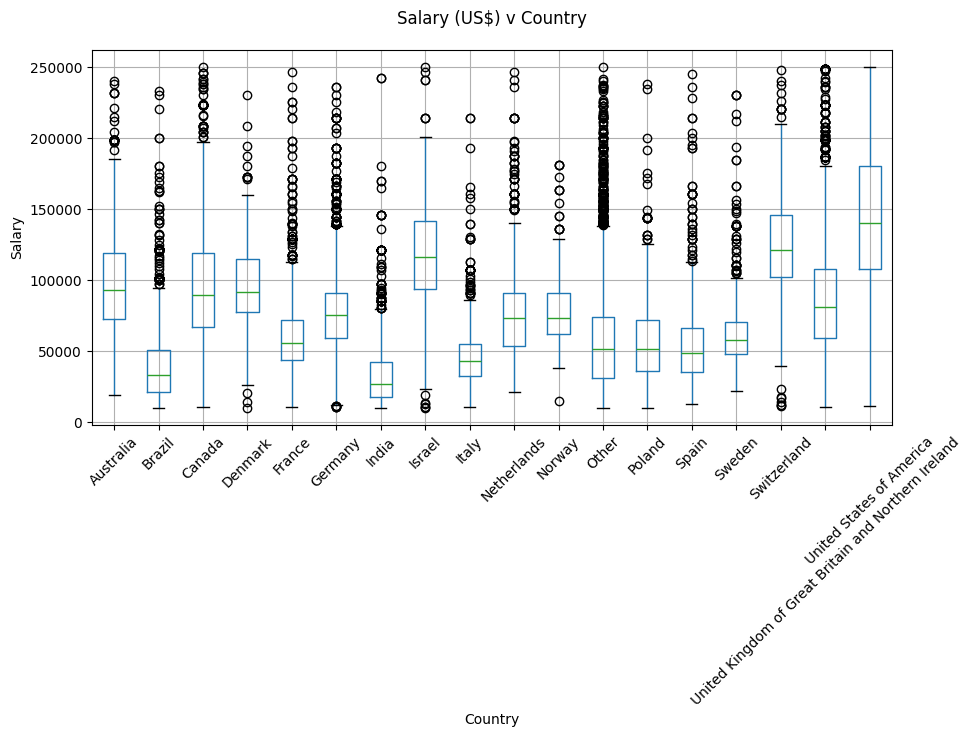

In [86]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title(' ')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

In [87]:
df["YearsCodePro"].unique()


array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '4', '16', '28', '11', '8', '24', '25',
       '12', '20', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '40', '34', '42', '26', '31', '36', '39', '32', '44', '37',
       '35', '48', 'More than 50 years', '45', '41', '50', '46', '49',
       '47'], dtype=object)

In [88]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df["YearsCodePro"].unique()


array([23. ,  7. , 21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. ,  4. , 16. , 28. , 11. ,  8. , 24. , 25. , 12. ,
       20. , 18. , 30. , 27. , 17. , 43. , 38. , 33. , 29. , 22. ,  1. ,
       40. , 34. , 42. , 26. , 31. , 36. , 39. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [89]:
df["EdLevel"].unique()


array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [90]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [91]:
df["EdLevel"].unique()


array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder
le_edu = LabelEncoder()
df["EdLevel"]=le_edu.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 1, 2, 3])

In [93]:
df['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Other',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France', 'Spain',
       'Brazil', 'Italy', 'Canada', 'Switzerland', 'India', 'Norway',
       'Denmark', 'Israel', 'Poland'], dtype=object)

In [94]:
le_country = LabelEncoder()

df["Country"]=le_country.fit_transform(df['Country'])

df["Country"].unique()

array([17, 16, 11,  0,  9,  5, 14,  4, 13,  1,  8,  2, 15,  6, 10,  3,  7,
       12])

In [95]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,17,0,23.0,250000.0
3,17,0,7.0,156000.0
5,16,1,21.0,96828.0
6,17,1,3.0,135000.0
7,17,0,3.0,80000.0


In [105]:
X=df.drop('Salary',axis=1).reset_index().drop('index',axis=1)
y=df['Salary'].reset_index().drop('index',axis=1)

In [106]:
print(X.head())
print(y.head())

   Country  EdLevel  YearsCodePro
0       17        0          23.0
1       17        0           7.0
2       16        1          21.0
3       17        1           3.0
4       17        0           3.0
     Salary
0  250000.0
1  156000.0
2   96828.0
3  135000.0
4   80000.0


((28292, 3), (7073, 3))

In [124]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, accuracy_score
# import pprint

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape, X_test.shape)

# # Reshape y_train and y_test to 1D arrays
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

# # Define the models and their parameters in a dictionary
# models_parameters = {
#     'DecisionTreeRegressor': {
#         'model': DecisionTreeRegressor(),
#         'params': {
#             'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
#             'splitter': ['best', 'random'],
#             'max_depth': [None, 10, 20, 30],
#             'min_samples_split': [2, 5, 10]
#         }
#     },
#     'RandomForestRegressor': {
#         'model': RandomForestRegressor(),
#         'params': {
#             'n_estimators': [100, 200, 300],
#             'criterion': ['squared_error', 'absolute_error'],
#             'max_depth': [None, 10, 20, 30],
#             'min_samples_split': [2, 4, 6],
#             'min_samples_leaf': [1, 2, 4]
#         }
#     },
#     'LinearRegression': {
#         'model': LinearRegression(),
#         'params': {
#             'fit_intercept': [True, False],
#             'normalize': [True, False],
#             'copy_X': [True, False],
#             'n_jobs': [None, 1, 2, 4]
#         }
#     }
# }

# # Function to perform grid search and find the best model and parameters
# def perform_grid_search(models_params, X, y):
#     best_models = {}
#     for name, model_info in models_params.items():
#         grid_search = GridSearchCV(estimator=model_info['model'], param_grid=model_info['params'], cv=5, scoring='neg_mean_squared_error')
#         grid_search.fit(X, y)
#         best_models[name] = {
#             'best_estimator': grid_search.best_estimator_,
#             'best_params': grid_search.best_params_,
#             'best_score': grid_search.best_score_
#         }
#     return best_models

# # Perform grid search for regression (Decision Tree, Random Forest, Linear Regression)
# best_regression_models = perform_grid_search(models_parameters, X_train, y_train)

# # Print the results
# print("\nBest Regression Models and Parameters:")
# pprint.pprint(best_regression_models)

In [125]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [126]:
y_pred = linear_reg.predict(X)


In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print('${:,.02f}'.format(error))

$33,174.70


In [129]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [130]:
y_pred = dec_tree_reg.predict(X)


In [131]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,118.01


In [132]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

e:\Anaconda\envs\ml_app\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [133]:
y_pred = random_forest_reg.predict(X)


In [134]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,174.70


In [138]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=42)
gs=GridSearchCV(regressor, parameters, cv=5,scoring='neg_mean_squared_error')
gs.fit(X, y.values)

print("Best Parameters: ",gs.best_params_)

Best Parameters:  {'max_depth': 10}


In [139]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,949.04


In [140]:
X

,Country,EdLevel,YearsCodePro
0,17,0,23.0
1,17,0,7.0
2,16,1,21.0
3,17,1,3.0
4,17,0,3.0
...,...,...,...
35360,11,3,5.0
35361,1,2,24.0
35362,6,0,2.0
35363,4,2,9.0


In [159]:
# country, edlevel, yearscode
X = np.array([["India", 'Bachelor’s degree',7]])
X

array([['India', 'Bachelor’s degree', '7']], dtype='<U21')

In [160]:
X[:,0]=le_country.transform(X[:,0])
X[:,1]=le_edu.transform(X[:,1])
X=X.astype(float)
X

array([[6., 0., 7.]])

In [170]:
pred=regressor.predict(X)
pred[0]

e:\Anaconda\envs\ml_app\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


np.float64(30680.73469387755)

In [165]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_edu}
with open('Model/saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [167]:
with open('Model/saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

model = data['model']
le_country = data['le_country']
le_education = data['le_education']

# Test the loaded model
y_pred=model.predict(X)
y_pred



e:\Anaconda\envs\ml_app\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([30680.73469388])